In [11]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [12]:
site = pd.read_csv("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\edited_site_data.csv")
epic = pd.read_csv("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\edited_epic_data.csv")

In [3]:
site.columns

Index(['Unnamed: 0', 'Site', 'Crop', 'Experiment', 'Treatment ',
       'Mineral N kg/ha/y', 'farmyard manure t/ha/year',
       'Reported yield data (t DM/ha)', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Mean', 'min_yield',
       'max_yield', 'Prec (mm)', 'Soil texture', 'Sand', 'Silt', 'Clay'],
      dtype='object')

In [13]:
site['prec_binned'] = pd.qcut(site['Prec (mm)'],4)

In [5]:
site.head()

,Unnamed: 0,Site,Crop,Experiment,Treatment,Mineral N kg/ha/y,farmyard manure t/ha/year,Reported yield data (t DM/ha),2000,2001,...,2018,Mean,min_yield,max_yield,Prec (mm),Soil texture,Sand,Silt,Clay,prec_binned
0,0,Kroměříž,WWHT,norf,NaN,100.0,12.5,grain,NaN,5.8650,...,NaN,7.096438,3.9100,9.4775,568.0,loam,40.0,40.0,20.0,"(483.0, 568.0]"
1,1,Kroměříž,WWHT,mono,all,150.0,0.0,grain,NaN,4.7600,...,NaN,5.717313,2.9325,7.4800,568.0,loam,40.0,40.0,20.0,"(483.0, 568.0]"
2,2,Kroměříž,BARL,norf,0,0.0,12.5,grain,NaN,3.8080,...,NaN,5.859687,3.8080,7.9645,568.0,loam,40.0,40.0,20.0,"(483.0, 568.0]"
3,3,Kroměříž,BARL,norf,30,30.0,12.5,grain,NaN,4.3180,...,NaN,6.143906,4.3180,7.8200,568.0,loam,40.0,40.0,20.0,"(483.0, 568.0]"
4,4,Kroměříž,BARL,norf,60,60.0,12.5,grain,NaN,4.2925,...,NaN,6.047750,4.2925,7.6160,568.0,loam,40.0,40.0,20.0,"(483.0, 568.0]"


In [14]:
site['CROP'].value_counts()

WWHT    305
BARL    300
C180     14
C100      3
Name: CROP, dtype: int64

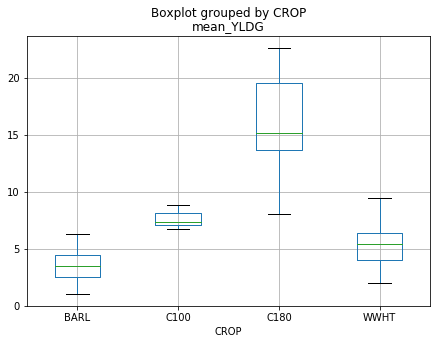

In [15]:
# box plots 
boxplot = site.boxplot(column=['mean_YLDG'], by = 'CROP', figsize = (7,5))
plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\boxplot_mean_yield_by_crop.jpg")

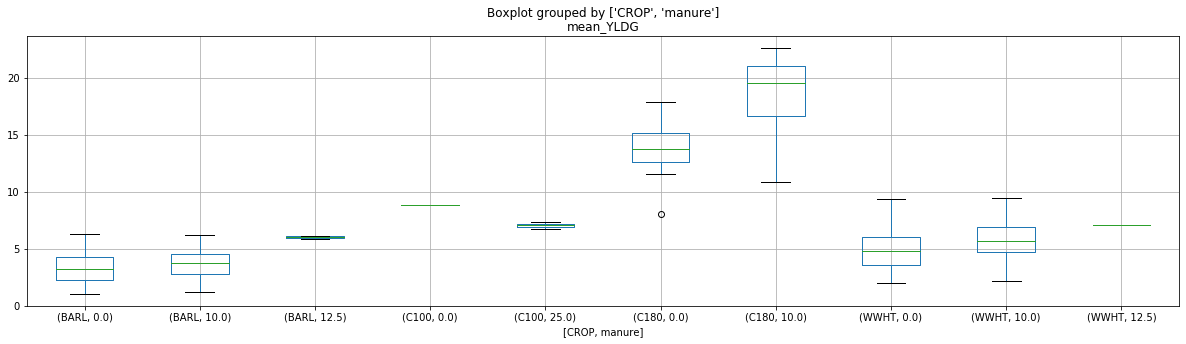

In [17]:
# box plots 
boxplot = site.boxplot(column=['mean_YLDG'], by = ['CROP', 'manure'], figsize = (20,5))
plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\boxplot_mean_yield_by_crop_and_manure.jpg")

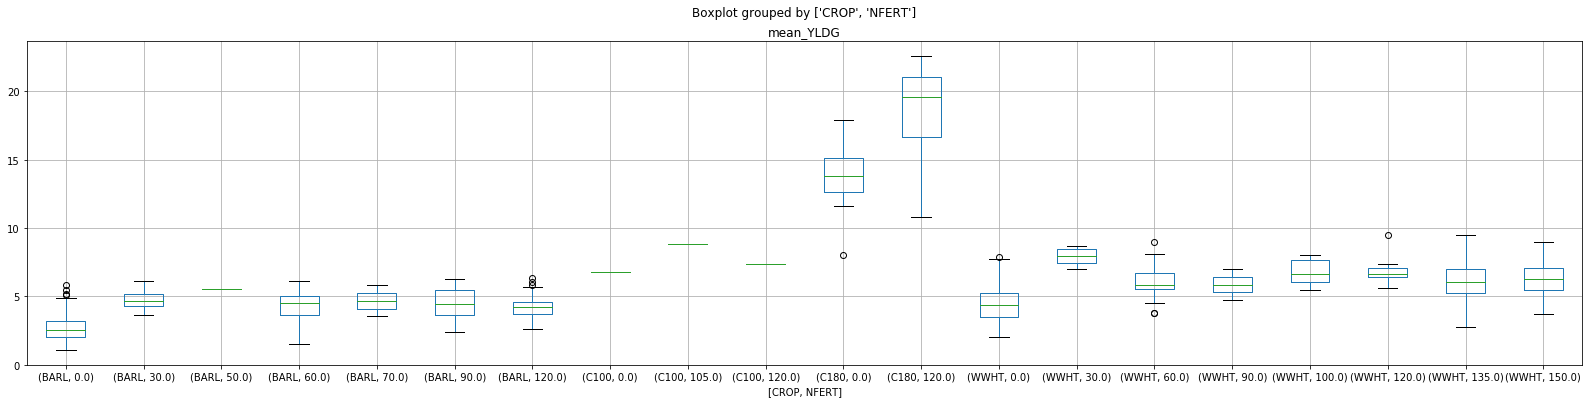

In [18]:
# box plots 
boxplot = site.boxplot(column=['mean_YLDG'], by = ['CROP', 'NFERT'], figsize = (27,6))
plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\boxplot_mean_yield_by_crop_and_nfert.jpg")

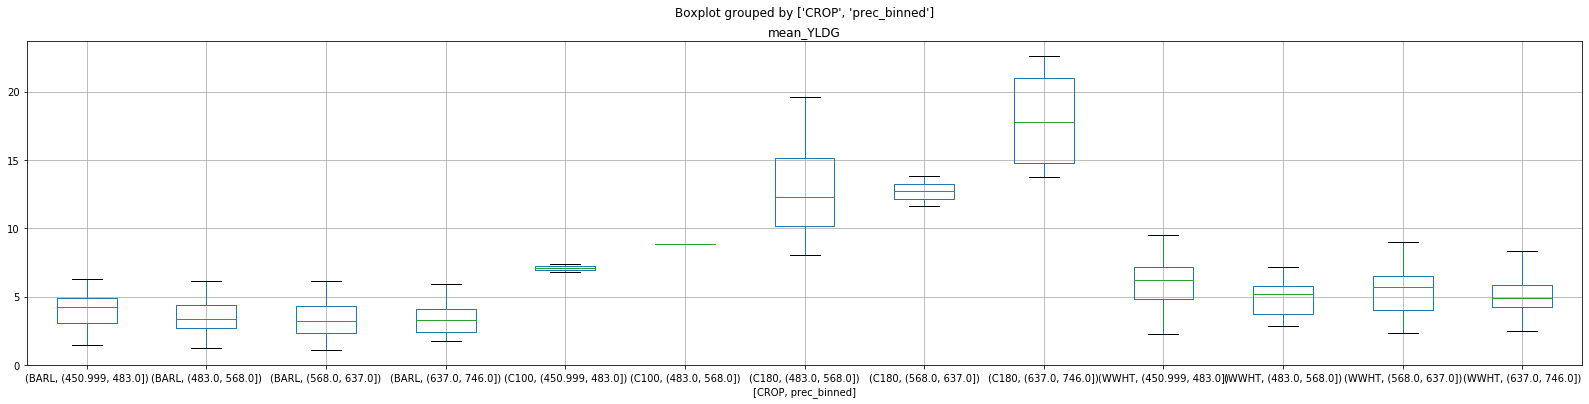

In [19]:
# box plots 
boxplot = site.boxplot(column=['mean_YLDG'], by = ['CROP', 'prec_binned'], figsize = (27,6))
plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\boxplot_mean_yield_by_crop_and_prec.jpg")

In [20]:
WWHT = site[site['CROP'] == 'WWHT']
BARL = site[site['CROP'] == 'BARL']
C100 = site[site['CROP'] == 'C100']
C180 = site[site['CROP'] == 'C180']

# crop specific yields
WWHT_yield = site[site['CROP'] == 'WWHT']['mean_YLDG']
BARL_yield = site[site['CROP'] == 'BARL']['mean_YLDG']
C100_yield = site[site['CROP'] == 'C100']['mean_YLDG']
C180_yield = site[site['CROP'] == 'C180']['mean_YLDG']

# crop + nfert 
WWHT_yield_N0 = site[(site['CROP'] == 'WWHT') & (site['NFERT'] == 0)]['mean_YLDG']
BARL_yield_N0 = site[(site['CROP'] == 'BARL') & (site['NFERT'] == 0)]['mean_YLDG']
C100_yield_N0 = site[(site['CROP'] == 'C100') & (site['NFERT'] == 0)]['mean_YLDG']
C180_yield_N0 = site[(site['CROP'] == 'C180') & (site['NFERT'] == 0)]['mean_YLDG']

WWHT_yield_N1_to_60 = site[(site['CROP'] == 'WWHT') & (site['NFERT'] > 0) & (site['NFERT'] <= 60)]['mean_YLDG']
BARL_yield_N1_to_60 = site[(site['CROP'] == 'BARL') & (site['NFERT'] > 0) & (site['NFERT'] <= 60)]['mean_YLDG']
C100_yield_N1_to_60 = site[(site['CROP'] == 'C100') & (site['NFERT'] > 0) & (site['NFERT'] <= 60)]['mean_YLDG']
C180_yield_N1_to_60 = site[(site['CROP'] == 'C180') & (site['NFERT'] > 0) & (site['NFERT'] <= 60)]['mean_YLDG']

WWHT_yield_N61_to_100 = site[(site['CROP'] == 'WWHT') & (site['NFERT'] > 60) & (site['NFERT'] <= 100)]['mean_YLDG']
BARL_yield_N61_to_100 = site[(site['CROP'] == 'BARL') & (site['NFERT'] > 60) & (site['NFERT'] <= 100)]['mean_YLDG']
C100_yield_N61_to_100 = site[(site['CROP'] == 'C100') & (site['NFERT'] > 60) & (site['NFERT'] <= 100)]['mean_YLDG']
C180_yield_N61_to_100 = site[(site['CROP'] == 'C180') & (site['NFERT'] > 60) & (site['NFERT'] <= 100)]['mean_YLDG']

WWHT_yield_N101_to_250 = site[(site['CROP'] == 'WWHT') & (site['NFERT'] > 100)]['mean_YLDG']
BARL_yield_N101_to_250 = site[(site['CROP'] == 'BARL') & (site['NFERT'] > 100)]['mean_YLDG']
C100_yield_N101_to_250 = site[(site['CROP'] == 'C100') & (site['NFERT'] > 100)]['mean_YLDG']
C180_yield_N101_to_250 = site[(site['CROP'] == 'C180') & (site['NFERT'] > 100)]['mean_YLDG']

# crop + manure 
WWHT_yield_M0 = site[(site['CROP'] == 'WWHT') & (site['manure'] == 0)]['mean_YLDG']
BARL_yield_M0 = site[(site['CROP'] == 'BARL') & (site['manure'] == 0)]['mean_YLDG']
C100_yield_M0 = site[(site['CROP'] == 'C100') & (site['manure'] == 0)]['mean_YLDG']
C180_yield_M0 = site[(site['CROP'] == 'C180') & (site['manure'] == 0)]['mean_YLDG']

WWHT_yield_M10 = site[(site['CROP'] == 'WWHT') & (site['manure'] == 10)]['mean_YLDG']
BARL_yield_M10 = site[(site['CROP'] == 'BARL') & (site['manure'] == 10)]['mean_YLDG']
C100_yield_M10 = site[(site['CROP'] == 'C100') & (site['manure'] == 10)]['mean_YLDG']
C180_yield_M10 = site[(site['CROP'] == 'C180') & (site['manure'] == 10)]['mean_YLDG']

WWHT_yield_M12_5 = site[(site['CROP'] == 'WWHT') & (site['manure'] == 12.5)]['mean_YLDG']
BARL_yield_M12_5 = site[(site['CROP'] == 'BARL') & (site['manure'] == 12.5)]['mean_YLDG']
C100_yield_M12_5 = site[(site['CROP'] == 'C100') & (site['manure'] == 12.5)]['mean_YLDG']
C180_yield_M12_5 = site[(site['CROP'] == 'C180') & (site['manure'] == 12.5)]['mean_YLDG']

WWHT_yield_M25 = site[(site['CROP'] == 'WWHT') & (site['manure'] == 25)]['mean_YLDG']
BARL_yield_M25 = site[(site['CROP'] == 'BARL') & (site['manure'] == 25)]['mean_YLDG']
C100_yield_M25 = site[(site['CROP'] == 'C100') & (site['manure'] == 25)]['mean_YLDG']
C180_yield_M25 = site[(site['CROP'] == 'C180') & (site['manure'] == 25)]['mean_YLDG']

# crop + precip 
WWHT_yield_prec400 = site[(site['CROP'] == 'WWHT') & (site['Prec (mm)'] <500)]['mean_YLDG']
BARL_yield_prec400 = site[(site['CROP'] == 'BARL') & (site['Prec (mm)'] <500)]['mean_YLDG']
C100_yield_prec400 = site[(site['CROP'] == 'C100') & (site['Prec (mm)'] <500)]['mean_YLDG']
C180_yield_prec400 = site[(site['CROP'] == 'C180') & (site['Prec (mm)'] <500)]['mean_YLDG']

WWHT_yield_prec500 = site[(site['CROP'] == 'WWHT') & (site['Prec (mm)'] >= 500) & (site['Prec (mm)'] < 600)]['mean_YLDG']
BARL_yield_prec500 = site[(site['CROP'] == 'BARL') & (site['Prec (mm)'] >= 500) & (site['Prec (mm)'] < 600)]['mean_YLDG']
C100_yield_prec500 = site[(site['CROP'] == 'C100') & (site['Prec (mm)'] >= 500) & (site['Prec (mm)'] < 600)]['mean_YLDG']
C180_yield_prec500 = site[(site['CROP'] == 'C180') & (site['Prec (mm)'] >= 500) & (site['Prec (mm)'] < 600)]['mean_YLDG']

WWHT_yield_prec600 = site[(site['CROP'] == 'WWHT') & (site['Prec (mm)'] >= 600) & (site['Prec (mm)'] < 700)]['mean_YLDG']
BARL_yield_prec600 = site[(site['CROP'] == 'BARL') & (site['Prec (mm)'] >= 600) & (site['Prec (mm)'] < 700)]['mean_YLDG']
C100_yield_prec600 = site[(site['CROP'] == 'C100') & (site['Prec (mm)'] >= 600) & (site['Prec (mm)'] < 700)]['mean_YLDG']
C180_yield_prec600 = site[(site['CROP'] == 'C180') & (site['Prec (mm)'] >= 600) & (site['Prec (mm)'] < 700)]['mean_YLDG']

WWHT_yield_prec700 = site[(site['CROP'] == 'WWHT') & (site['Prec (mm)'] >= 700)]['mean_YLDG'] 
BARL_yield_prec700 = site[(site['CROP'] == 'BARL') & (site['Prec (mm)'] >= 700)]['mean_YLDG'] 
C100_yield_prec700 = site[(site['CROP'] == 'C100') & (site['Prec (mm)'] >= 700)]['mean_YLDG'] 
C180_yield_prec700 = site[(site['CROP'] == 'C180') & (site['Prec (mm)'] >= 700)]['mean_YLDG']

In [ ]:
# box plots 
boxplot = site.boxplot(column=['mean_YLDG'], by = 'CROP')